In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('propensity_clean.csv')
data = data.drop(labels = 'Unnamed: 0', axis = 1)
data

,Cust_Num,Payment.Method.description,DocumentNo,Doc..Date,Net.due.dt,Amount,Clearing.Date,Clrng.doc.,ZIPCODE,Region,City,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.
0,5039221123,Direct Debits 2,91225033129,14-Jan-15,28-Feb-15,23672.43,2015-03-02,80992133504,AX0012,AA111,AA22,34.0,2.0,45,2
1,5039221123,Direct Debits 2,91225033130,14-Jan-15,28-Feb-15,3689.47,2015-03-02,80992133504,AX0012,AA111,AA22,34.0,2.0,45,2
2,5039221123,Direct Debits 2,91225033131,15-Jan-15,28-Feb-15,366.84,2015-03-02,80992133504,AX0012,AA111,AA22,34.0,2.0,44,2
3,5039221116,Direct Debits 2,91225033132,23-Feb-15,28-Feb-15,259.84,2015-03-02,80992133507,AX0013,AA112,AA23,65.0,5.0,5,2
4,5039221094,Direct Debits 2,91225033133,25-Feb-15,02-Mar-15,176.21,2015-03-02,80992133508,AX0014,AA113,AA24,155.0,12.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45836,5039221078,No Payment Method,91225078963,12-10-2015,04-03-2016,33330.94,2016-03-17,80992179294,AX0045,AA126,AA55,155.0,12.0,144,13
45837,5039221106,No Payment Method,91225078964,10-11-2015,03-04-2016,6781.28,2016-03-07,80992179341,AX0044,AA126,AA54,118.0,9.0,145,-27
45838,5039221082,No Payment Method,91225078965,27-11-2015,03-04-2016,2724.62,2016-03-07,80992179341,AX0049,AA126,AA58,155.0,12.0,128,-27
45839,5039221082,No Payment Method,91225078966,24-11-2015,03-04-2016,2353.44,2016-03-07,80992179341,AX0049,AA126,AA58,155.0,12.0,131,-27


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45841 entries, 0 to 45840
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cust_Num                    45841 non-null  int64  
 1   Payment.Method.description  45841 non-null  object 
 2   DocumentNo                  45841 non-null  int64  
 3   Doc..Date                   45841 non-null  object 
 4   Net.due.dt                  45841 non-null  object 
 5   Amount                      45841 non-null  float64
 6   Clearing.Date               45841 non-null  object 
 7   Clrng.doc.                  45841 non-null  int64  
 8   ZIPCODE                     45841 non-null  object 
 9   Region                      45841 non-null  object 
 10  City                        45841 non-null  object 
 11  Age.Of.Customer.Months.     45841 non-null  float64
 12  Age.Of.Customer.Year.       45841 non-null  float64
 13  Payment.Term                458

In [4]:
data['Cust_Num'] = data['Cust_Num'].astype(str)
data['DocumentNo'] = data['DocumentNo'].astype(str)
data['Clrng.doc.'] = data['Clrng.doc.'].astype(str) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45841 entries, 0 to 45840
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cust_Num                    45841 non-null  object 
 1   Payment.Method.description  45841 non-null  object 
 2   DocumentNo                  45841 non-null  object 
 3   Doc..Date                   45841 non-null  object 
 4   Net.due.dt                  45841 non-null  object 
 5   Amount                      45841 non-null  float64
 6   Clearing.Date               45841 non-null  object 
 7   Clrng.doc.                  45841 non-null  object 
 8   ZIPCODE                     45841 non-null  object 
 9   Region                      45841 non-null  object 
 10  City                        45841 non-null  object 
 11  Age.Of.Customer.Months.     45841 non-null  float64
 12  Age.Of.Customer.Year.       45841 non-null  float64
 13  Payment.Term                458

In [5]:
data.describe()

,Amount,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.
count,4.584100e+04,45841.000000,45841.000000,45841.000000,45841.000000
mean,1.780642e+04,150.590399,11.664329,13.795096,0.971467
std,6.877563e+04,21.110622,1.660039,26.355331,14.218775
min,1.680000e+00,0.500000,0.000000,0.000000,-117.000000
25%,7.850600e+02,155.000000,12.000000,5.000000,-1.000000
50%,3.195870e+03,155.000000,12.000000,5.000000,1.000000
75%,1.302210e+04,155.000000,12.000000,5.000000,2.000000
max,5.709354e+06,155.000000,12.000000,389.000000,1257.000000


In [6]:
data['Cust_Num'].is_unique

False

In [7]:
data['Cust_Num'].value_counts()

5039221090    10219
5039221094     9712
5039221092     7838
5039221093     6367
5039221095     3935
              ...  
5039221098        4
5039221136        3
5039221125        2
5039221137        2
5039221132        1
Name: Cust_Num, Length: 69, dtype: int64

In [8]:
data['Age.Of.Customer.Months.'].value_counts()

155.0    43163
144.0      346
75.0       155
111.0      139
65.0       135
22.0       127
112.0      125
93.0       120
142.0      112
136.0      109
38.0       108
25.0       101
55.0       101
16.0        99
40.0        85
28.0        73
139.0       72
102.0       71
118.0       67
54.0        59
123.0       58
20.0        56
12.0        52
14.0        48
24.0        46
34.0        42
10.0        41
42.0        37
77.0        33
109.0       27
13.0        20
135.0        9
0.5          3
27.0         2
Name: Age.Of.Customer.Months., dtype: int64

In [9]:
data['Age.Of.Customer.Year.'].value_counts()

12.0    43509
1.0       402
9.0       358
11.0      302
2.0       264
3.0       230
6.0       188
4.0       160
5.0       135
7.0       120
8.0        71
10.0       58
0.0        41
0.5         3
Name: Age.Of.Customer.Year., dtype: int64

In [10]:
data['Cust_Num'].value_counts()

5039221090    10219
5039221094     9712
5039221092     7838
5039221093     6367
5039221095     3935
              ...  
5039221098        4
5039221136        3
5039221125        2
5039221137        2
5039221132        1
Name: Cust_Num, Length: 69, dtype: int64

In [11]:
for i in list(data.columns):
    if data[i].nunique() == 1:
        print(i)

In [12]:
data['Payment.Method.description'].value_counts()

Direct Debits 2        24010
Direct Debits 1        18982
No Payment Method       1308
Regulatory               772
Regulatory 2             604
Third Part Payments       98
Regulatory 1              43
Wire                      24
Name: Payment.Method.description, dtype: int64

In [13]:
max(data['Days.Overdue..Delay.'])

1257

In [14]:
# new features
# 1. frequency 
# 2. total amount 

In [15]:
customerdata = data.groupby(by = 'Cust_Num').sum() 
customerdata

,Amount,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.
Cust_Num,,,,,
5039221069,3267015.25,3100.0,240.0,2092,488
5039221070,9960458.15,52855.0,4092.0,7804,-768
5039221071,37173266.47,5580.0,432.0,3633,-849
5039221072,1521192.22,15810.0,1224.0,599,12
5039221073,243642.09,6045.0,468.0,4004,-543
...,...,...,...,...,...
5039221133,250928.23,247.0,19.0,1040,-629
5039221134,300203.01,624.0,52.0,2443,-1677
5039221135,180550.46,410.0,0.0,1844,-1509


In [16]:
data[data['Cust_Num'] == '5039221069']
# for each customer, the age is constant

,Cust_Num,Payment.Method.description,DocumentNo,Doc..Date,Net.due.dt,Amount,Clearing.Date,Clrng.doc.,ZIPCODE,Region,City,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.
1393,5039221069,No Payment Method,91225034522,26-Nov-14,28-Feb-15,24735.85,2015-03-09,80992134897,AX0034,AA126,AA66,155.0,12.0,94,9
2774,5039221069,No Payment Method,91225035903,18-Nov-14,28-Feb-15,659902.98,2015-03-18,80992136278,AX0034,AA126,AA66,155.0,12.0,102,18
2775,5039221069,No Payment Method,91225035904,18-Nov-14,28-Feb-15,16906.42,2015-03-18,80992136278,AX0034,AA126,AA66,155.0,12.0,102,18
5145,5039221069,No Payment Method,91225038274,19-Dec-14,31-Mar-15,17981.89,2015-04-07,80992138649,AX0034,AA126,AA66,155.0,12.0,102,7
5146,5039221069,No Payment Method,91225038275,22-Dec-14,31-Mar-15,86575.47,2015-04-07,80992138649,AX0034,AA126,AA66,155.0,12.0,99,7
8797,5039221069,No Payment Method,91225041926,21-Jan-15,01-May-15,16906.42,2015-05-15,80992142301,AX0034,AA126,AA66,155.0,12.0,100,14
13426,5039221069,No Payment Method,91225046555,20-Feb-15,29-May-15,6134.49,2015-09-28,80992146930,AX0034,AA126,AA66,155.0,12.0,98,122
13427,5039221069,No Payment Method,91225046556,04-Feb-15,29-May-15,10926.79,2015-10-14,80992146931,AX0034,AA126,AA66,155.0,12.0,114,138
13428,5039221069,No Payment Method,91225046557,20-Feb-15,29-May-15,123679.25,2015-09-28,80992146930,AX0034,AA126,AA66,155.0,12.0,98,122
16515,5039221069,No Payment Method,91225049644,06-Mar-15,29-Jun-15,240672.28,2015-07-16,80992150019,AX0034,AA126,AA66,155.0,12.0,115,17


In [17]:
customerdata_mean = data.groupby('Cust_Num').mean()
customerdata_mean.head()

,Amount,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.
Cust_Num,,,,,
5039221069,1.633508e+05,155.0,12.0,104.600000,24.400000
5039221070,2.920955e+04,155.0,12.0,22.885630,-2.252199
5039221071,1.032591e+06,155.0,12.0,100.916667,-23.583333
5039221072,1.491365e+04,155.0,12.0,5.872549,0.117647
5039221073,6.247233e+03,155.0,12.0,102.666667,-13.923077


In [18]:
customerdata_count = data.groupby('Cust_Num').count()
customerdata_count.head()

,Payment.Method.description,DocumentNo,Doc..Date,Net.due.dt,Amount,Clearing.Date,Clrng.doc.,ZIPCODE,Region,City,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.
Cust_Num,,,,,,,,,,,,,,
5039221069,20,20,20,20,20,20,20,20,20,20,20,20,20,20
5039221070,341,341,341,341,341,341,341,341,341,341,341,341,341,341
5039221071,36,36,36,36,36,36,36,36,36,36,36,36,36,36
5039221072,102,102,102,102,102,102,102,102,102,102,102,102,102,102
5039221073,39,39,39,39,39,39,39,39,39,39,39,39,39,39


In [19]:
for i in customerdata.index:
    data.loc[data['Cust_Num']==i,'Total_Amount'] = customerdata.loc[i,'Amount']
    data.loc[data['Cust_Num']==i,'Total_Delays'] = customerdata.loc[i,'Days.Overdue..Delay.']
    data.loc[data['Cust_Num']==i,'Mean_Amount'] = customerdata_mean.loc[i,'Amount']
    data.loc[data['Cust_Num']==i,'Means_Delays'] = customerdata_mean.loc[i,'Days.Overdue..Delay.']
    data.loc[data['Cust_Num']==i,'Frequency'] = customerdata_count.loc[i,'Amount']

In [20]:
data.head()

,Cust_Num,Payment.Method.description,DocumentNo,Doc..Date,Net.due.dt,Amount,Clearing.Date,Clrng.doc.,ZIPCODE,Region,City,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.,Total_Amount,Total_Delays,Mean_Amount,Means_Delays,Frequency
0,5039221123,Direct Debits 2,91225033129,14-Jan-15,28-Feb-15,23672.43,2015-03-02,80992133504,AX0012,AA111,AA22,34.0,2.0,45,2,3.569270e+05,269.0,8498.260952,6.404762,42.0
1,5039221123,Direct Debits 2,91225033130,14-Jan-15,28-Feb-15,3689.47,2015-03-02,80992133504,AX0012,AA111,AA22,34.0,2.0,45,2,3.569270e+05,269.0,8498.260952,6.404762,42.0
2,5039221123,Direct Debits 2,91225033131,15-Jan-15,28-Feb-15,366.84,2015-03-02,80992133504,AX0012,AA111,AA22,34.0,2.0,44,2,3.569270e+05,269.0,8498.260952,6.404762,42.0
3,5039221116,Direct Debits 2,91225033132,23-Feb-15,28-Feb-15,259.84,2015-03-02,80992133507,AX0013,AA112,AA23,65.0,5.0,5,2,4.270080e+05,79.0,3163.022519,0.585185,135.0
4,5039221094,Direct Debits 2,91225033133,25-Feb-15,02-Mar-15,176.21,2015-03-02,80992133508,AX0014,AA113,AA24,155.0,12.0,5,0,2.279644e+08,4730.0,23472.443417,0.487026,9712.0


In [21]:
data_corr = data[['Cust_Num','Age.Of.Customer.Months.','Days.Overdue..Delay.','Total_Amount','Total_Delays','Mean_Amount','Means_Delays','Frequency']]
data_corr.head()

,Cust_Num,Age.Of.Customer.Months.,Days.Overdue..Delay.,Total_Amount,Total_Delays,Mean_Amount,Means_Delays,Frequency
0,5039221123,34.0,2,3.569270e+05,269.0,8498.260952,6.404762,42.0
1,5039221123,34.0,2,3.569270e+05,269.0,8498.260952,6.404762,42.0
2,5039221123,34.0,2,3.569270e+05,269.0,8498.260952,6.404762,42.0
3,5039221116,65.0,2,4.270080e+05,79.0,3163.022519,0.585185,135.0
4,5039221094,155.0,0,2.279644e+08,4730.0,23472.443417,0.487026,9712.0


[Text(0.5, 0, 'Age.Of.Customer.Months.'),
 Text(1.5, 0, 'Days.Overdue..Delay.'),
 Text(2.5, 0, 'Total_Amount'),
 Text(3.5, 0, 'Total_Delays'),
 Text(4.5, 0, 'Mean_Amount'),
 Text(5.5, 0, 'Means_Delays'),
 Text(6.5, 0, 'Frequency')]

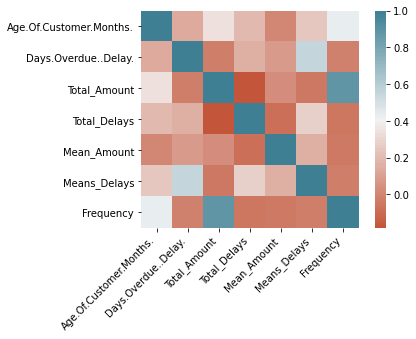

In [22]:
corr = data_corr.corr()
ax = sns.heatmap(
    corr, 
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [23]:
date_list = ['Doc..Date', 'Net.due.dt', 'Clearing.Date']
for i in date_list:
    data[i] = pd.to_datetime(data[i],dayfirst=True)
data

,Cust_Num,Payment.Method.description,DocumentNo,Doc..Date,Net.due.dt,Amount,Clearing.Date,Clrng.doc.,ZIPCODE,Region,City,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.,Total_Amount,Total_Delays,Mean_Amount,Means_Delays,Frequency
0,5039221123,Direct Debits 2,91225033129,2015-01-14,2015-02-28,23672.43,2015-03-02,80992133504,AX0012,AA111,AA22,34.0,2.0,45,2,3.569270e+05,269.0,8498.260952,6.404762,42.0
1,5039221123,Direct Debits 2,91225033130,2015-01-14,2015-02-28,3689.47,2015-03-02,80992133504,AX0012,AA111,AA22,34.0,2.0,45,2,3.569270e+05,269.0,8498.260952,6.404762,42.0
2,5039221123,Direct Debits 2,91225033131,2015-01-15,2015-02-28,366.84,2015-03-02,80992133504,AX0012,AA111,AA22,34.0,2.0,44,2,3.569270e+05,269.0,8498.260952,6.404762,42.0
3,5039221116,Direct Debits 2,91225033132,2015-02-23,2015-02-28,259.84,2015-03-02,80992133507,AX0013,AA112,AA23,65.0,5.0,5,2,4.270080e+05,79.0,3163.022519,0.585185,135.0
4,5039221094,Direct Debits 2,91225033133,2015-02-25,2015-03-02,176.21,2015-03-02,80992133508,AX0014,AA113,AA24,155.0,12.0,5,0,2.279644e+08,4730.0,23472.443417,0.487026,9712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45836,5039221078,No Payment Method,91225078963,2015-10-12,2016-03-04,33330.94,2016-03-17,80992179294,AX0045,AA126,AA55,155.0,12.0,144,13,4.922688e+05,1883.0,10046.301837,38.428571,49.0
45837,5039221106,No Payment Method,91225078964,2015-11-10,2016-04-03,6781.28,2016-03-07,80992179341,AX0044,AA126,AA54,118.0,9.0,145,-27,8.978816e+05,-301.0,13401.218507,-4.492537,67.0
45838,5039221082,No Payment Method,91225078965,2015-11-27,2016-04-03,2724.62,2016-03-07,80992179341,AX0049,AA126,AA58,155.0,12.0,128,-27,4.727539e+05,-384.0,5497.138023,-4.465116,86.0
45839,5039221082,No Payment Method,91225078966,2015-11-24,2016-04-03,2353.44,2016-03-07,80992179341,AX0049,AA126,AA58,155.0,12.0,131,-27,4.727539e+05,-384.0,5497.138023,-4.465116,86.0


In [24]:
data['Doc..Date'].value_counts()

2015-05-18    605
2016-02-12    453
2015-10-28    453
2015-07-10    435
2015-03-10    384
             ... 
2014-11-10      1
2011-11-23      1
2014-10-07      1
2014-12-11      1
2014-09-25      1
Name: Doc..Date, Length: 358, dtype: int64

In [25]:
data['Weekday_DocDate'] = data['Doc..Date'].dt.dayofweek+1
data['Weekday_ClearingDate'] = data['Clearing.Date'].dt.dayofweek+1
data['Weekday_NetdueDate'] = data['Net.due.dt'].dt.dayofweek+1
data.head()

,Cust_Num,Payment.Method.description,DocumentNo,Doc..Date,Net.due.dt,Amount,Clearing.Date,Clrng.doc.,ZIPCODE,Region,...,Payment.Term,Days.Overdue..Delay.,Total_Amount,Total_Delays,Mean_Amount,Means_Delays,Frequency,Weekday_DocDate,Weekday_ClearingDate,Weekday_NetdueDate
0,5039221123,Direct Debits 2,91225033129,2015-01-14,2015-02-28,23672.43,2015-03-02,80992133504,AX0012,AA111,...,45,2,3.569270e+05,269.0,8498.260952,6.404762,42.0,3,1,6
1,5039221123,Direct Debits 2,91225033130,2015-01-14,2015-02-28,3689.47,2015-03-02,80992133504,AX0012,AA111,...,45,2,3.569270e+05,269.0,8498.260952,6.404762,42.0,3,1,6
2,5039221123,Direct Debits 2,91225033131,2015-01-15,2015-02-28,366.84,2015-03-02,80992133504,AX0012,AA111,...,44,2,3.569270e+05,269.0,8498.260952,6.404762,42.0,4,1,6
3,5039221116,Direct Debits 2,91225033132,2015-02-23,2015-02-28,259.84,2015-03-02,80992133507,AX0013,AA112,...,5,2,4.270080e+05,79.0,3163.022519,0.585185,135.0,1,1,6
4,5039221094,Direct Debits 2,91225033133,2015-02-25,2015-03-02,176.21,2015-03-02,80992133508,AX0014,AA113,...,5,0,2.279644e+08,4730.0,23472.443417,0.487026,9712.0,3,1,1


In [26]:
data['Weekday_NetdueDate'].value_counts()

6    10809
1     9195
7     8909
3     7619
2     7595
4      969
5      745
Name: Weekday_NetdueDate, dtype: int64

In [27]:
data.describe()

,Amount,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.,Total_Amount,Total_Delays,Mean_Amount,Means_Delays,Frequency,Weekday_DocDate,Weekday_ClearingDate,Weekday_NetdueDate
count,4.584100e+04,45841.000000,45841.000000,45841.000000,45841.000000,4.584100e+04,45841.000000,4.584100e+04,45841.000000,45841.000000,45841.000000,45841.000000,45841.000000
mean,1.780642e+04,150.590399,11.664329,13.795096,0.971467,1.200807e+08,6223.760935,1.780642e+04,0.971467,7066.284527,2.805654,2.189045,3.971554
std,6.877563e+04,21.110622,1.660039,26.355331,14.218775,7.320650e+07,7751.079781,3.860005e+04,7.907079,3346.382022,1.392008,1.473365,2.311284
min,1.680000e+00,0.500000,0.000000,0.000000,-117.000000,2.158470e+03,-8723.000000,2.158470e+03,-36.804878,1.000000,1.000000,1.000000,1.000000
25%,7.850600e+02,155.000000,12.000000,5.000000,-1.000000,5.575551e+07,2211.000000,1.170759e+04,0.216362,3935.000000,2.000000,1.000000,2.000000
50%,3.195870e+03,155.000000,12.000000,5.000000,1.000000,1.311368e+08,3603.000000,1.429040e+04,0.459684,7838.000000,3.000000,2.000000,3.000000
75%,1.302210e+04,155.000000,12.000000,5.000000,2.000000,1.460336e+08,4730.000000,1.673091e+04,0.487026,9712.000000,4.000000,2.000000,6.000000
max,5.709354e+06,155.000000,12.000000,389.000000,1257.000000,2.279644e+08,22951.000000,1.768685e+06,785.000000,10219.000000,5.000000,7.000000,7.000000


In [28]:
data['LogAmount'] = np.log(data['Amount'])+1
data.head()

,Cust_Num,Payment.Method.description,DocumentNo,Doc..Date,Net.due.dt,Amount,Clearing.Date,Clrng.doc.,ZIPCODE,Region,...,Days.Overdue..Delay.,Total_Amount,Total_Delays,Mean_Amount,Means_Delays,Frequency,Weekday_DocDate,Weekday_ClearingDate,Weekday_NetdueDate,LogAmount
0,5039221123,Direct Debits 2,91225033129,2015-01-14,2015-02-28,23672.43,2015-03-02,80992133504,AX0012,AA111,...,2,3.569270e+05,269.0,8498.260952,6.404762,42.0,3,1,6,11.072066
1,5039221123,Direct Debits 2,91225033130,2015-01-14,2015-02-28,3689.47,2015-03-02,80992133504,AX0012,AA111,...,2,3.569270e+05,269.0,8498.260952,6.404762,42.0,3,1,6,9.213238
2,5039221123,Direct Debits 2,91225033131,2015-01-15,2015-02-28,366.84,2015-03-02,80992133504,AX0012,AA111,...,2,3.569270e+05,269.0,8498.260952,6.404762,42.0,4,1,6,6.904926
3,5039221116,Direct Debits 2,91225033132,2015-02-23,2015-02-28,259.84,2015-03-02,80992133507,AX0013,AA112,...,2,4.270080e+05,79.0,3163.022519,0.585185,135.0,1,1,6,6.560066
4,5039221094,Direct Debits 2,91225033133,2015-02-25,2015-03-02,176.21,2015-03-02,80992133508,AX0014,AA113,...,0,2.279644e+08,4730.0,23472.443417,0.487026,9712.0,3,1,1,6.171676


In [29]:
#data.to_csv('data_newfeature.csv',index=False)

/Users/elliezy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days.Overdue..Delay.', ylabel='Density'>

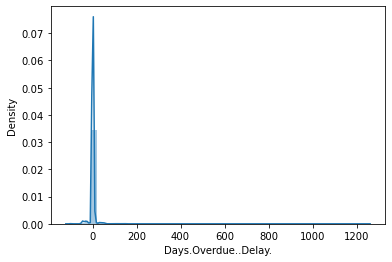

In [30]:
sns.distplot(data['Days.Overdue..Delay.'])

/Users/elliezy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days.Overdue..Delay.', ylabel='Density'>

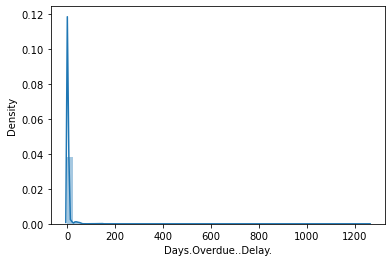

In [31]:
sns.distplot(data[data['Days.Overdue..Delay.']>0]['Days.Overdue..Delay.'])

In [32]:
x = data[data['Days.Overdue..Delay.']>0]['Days.Overdue..Delay.']

/Users/elliezy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days.Overdue..Delay.', ylabel='Density'>

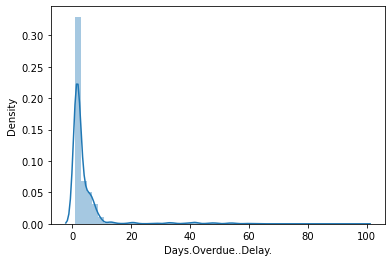

In [33]:
sns.distplot(x[x<100])

In [34]:
data['Amount'].dtype

dtype('float64')

In [35]:
data['Amount']

0        23672.43
1         3689.47
2          366.84
3          259.84
4          176.21
           ...   
45836    33330.94
45837     6781.28
45838     2724.62
45839     2353.44
45840     3164.94
Name: Amount, Length: 45841, dtype: float64

In [36]:
data['Amount']

0        23672.43
1         3689.47
2          366.84
3          259.84
4          176.21
           ...   
45836    33330.94
45837     6781.28
45838     2724.62
45839     2353.44
45840     3164.94
Name: Amount, Length: 45841, dtype: float64

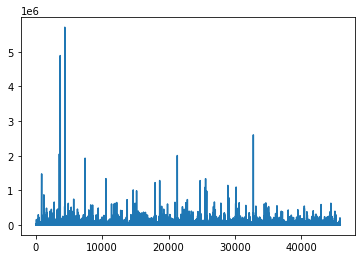

In [37]:
plt.plot(data['Amount'])

/Users/elliezy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

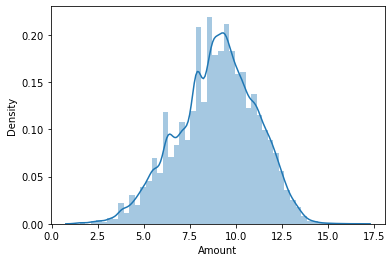

In [38]:
sns.distplot(np.log(data['Amount']) +1)

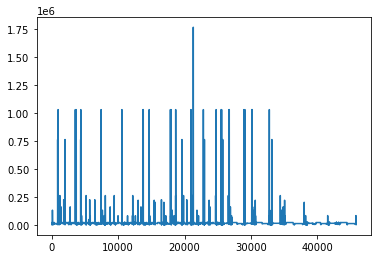

In [39]:
plt.plot(data['Mean_Amount'])

/Users/elliezy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mean_Amount', ylabel='Density'>

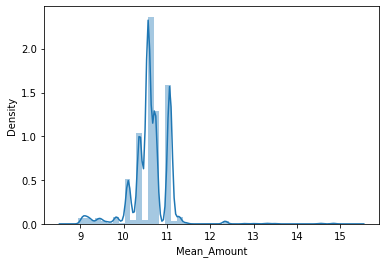

In [40]:
sns.distplot(np.log(data['Mean_Amount'])+1) 

# clustering

In [41]:
data = pd.read_csv('propensity_clean.csv')
data = data.drop(labels = 'Unnamed: 0', axis = 1)
data['Cust_Num'] = data['Cust_Num'].astype(str)

In [42]:
data['log_Amount'] = np.log(data['Amount'])+1
customerdata_mean = data.groupby('Cust_Num').mean()
customerdata_mean = customerdata_mean.drop(['DocumentNo','Clrng.doc.'],axis=1)

In [43]:
# dataset for clustering model
customerdata_mean.columns = ['Mean_Amount','Mean_Age_Months','Mean_Age_Year','Mean_PaymentTerm','Mean_OverdueDelay','Mean_LogAmount']
customerdata_cluster = customerdata_mean
customerdata_cluster['LogFrequency'] = np.log(customerdata_count['Amount'])+1
customerdata_cluster = customerdata_cluster.drop(['Mean_Age_Year','Mean_Amount'],axis = 1)
customerdata_cluster

,Mean_Age_Months,Mean_PaymentTerm,Mean_OverdueDelay,Mean_LogAmount,LogFrequency
Cust_Num,,,,,
5039221069,155.0,104.600000,24.400000,12.034345,3.995732
5039221070,155.0,22.885630,-2.252199,9.237197,6.831882
5039221071,155.0,100.916667,-23.583333,14.177307,4.583519
5039221072,155.0,5.872549,0.117647,9.253301,5.624973
5039221073,155.0,102.666667,-13.923077,9.254559,4.663562
...,...,...,...,...,...
5039221133,13.0,54.736842,-33.105263,9.514821,3.944439
5039221134,12.0,46.980769,-32.250000,8.393747,4.951244
5039221135,10.0,44.975610,-36.804878,8.870668,4.713572


In [44]:
# standardize
from sklearn import preprocessing
# Get column names first
names = customerdata_cluster.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_cluster = scaler.fit_transform(customerdata_cluster)
scaled_cluster = pd.DataFrame(scaled_cluster, columns=names)
scaled_cluster

,Mean_Age_Months,Mean_PaymentTerm,Mean_OverdueDelay,Mean_LogAmount,LogFrequency
0,0.888279,0.697942,0.120372,1.525110,-0.730115
1,0.888279,-0.895843,-0.159607,-0.164631,0.841063
2,0.888279,0.626101,-0.383688,2.819662,-0.404491
3,0.888279,-1.227671,-0.134712,-0.154903,0.172456
4,0.888279,0.660233,-0.282208,-0.154143,-0.360149
...,...,...,...,...,...
64,-1.660662,-0.274606,-0.483715,0.003080,-0.758530
65,-1.678613,-0.425883,-0.474731,-0.674155,-0.200778
66,-1.714513,-0.464992,-0.522579,-0.386050,-0.332444
67,-1.885041,-0.633554,-0.104433,0.156339,-1.781086


/Users/elliezy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mean_LogAmount', ylabel='Density'>

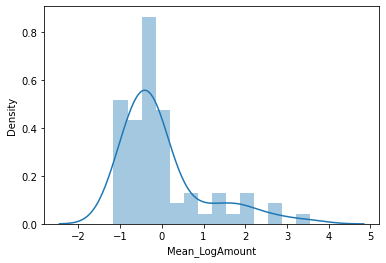

In [45]:
sns.distplot(scaled_cluster.Mean_LogAmount)

/Users/elliezy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

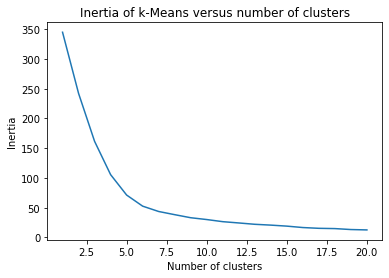

In [46]:
# K-Means
from sklearn.cluster import KMeans
scores = [KMeans(n_clusters=i+1).fit(scaled_cluster).inertia_ for i in range(20)]
sns.lineplot(np.arange(1, 21), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
# k = 5?

In [47]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.01,min_samples=10).fit(scaled_cluster)

In [48]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1])

In [49]:
scaled_cluster.describe()

,Mean_Age_Months,Mean_PaymentTerm,Mean_OverdueDelay,Mean_LogAmount,LogFrequency
count,6.900000e+01,6.900000e+01,69.000000,6.900000e+01,6.900000e+01
mean,-8.045094e-18,-3.539842e-17,0.000000,-5.599386e-16,-8.366898e-17
std,1.007326e+00,1.007326e+00,1.007326,1.007326e+00,1.007326e+00
min,-1.885041e+00,-1.244690e+00,-0.522579,-1.157780e+00,-2.389698e+00
25%,-9.247004e-01,-7.100169e-01,-0.182853,-6.457700e-01,-3.893127e-01
50%,5.472239e-01,-4.202707e-01,-0.104433,-3.271411e-01,-2.049987e-02
75%,8.882795e-01,6.696029e-01,-0.003395,4.397679e-02,2.716455e-01
max,8.882795e-01,2.544930e+00,8.110395,3.544276e+00,2.724671e+00


In [50]:
# hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [51]:
# linkage
Z = linkage(scaled_cluster)
Z = pd.DataFrame(Z)
Z

,0,1,2,3
0,11.0,15.0,0.099138,2.0
1,7.0,22.0,0.119361,2.0
2,23.0,25.0,0.127234,2.0
3,62.0,65.0,0.146902,2.0
4,5.0,19.0,0.169939,2.0
...,...,...,...,...
63,28.0,131.0,1.257484,65.0
64,8.0,132.0,1.282020,66.0
65,56.0,133.0,1.424280,67.0
66,29.0,134.0,1.904944,68.0


In [52]:
scaled_cluster.index = customerdata_cluster.index
scaled_cluster.index

Index(['5039221069', '5039221070', '5039221071', '5039221072', '5039221073',
       '5039221074', '5039221075', '5039221076', '5039221077', '5039221078',
       '5039221079', '5039221080', '5039221081', '5039221082', '5039221083',
       '5039221084', '5039221085', '5039221086', '5039221087', '5039221088',
       '5039221089', '5039221090', '5039221091', '5039221092', '5039221093',
       '5039221094', '5039221095', '5039221096', '5039221097', '5039221098',
       '5039221099', '5039221100', '5039221101', '5039221102', '5039221103',
       '5039221104', '5039221105', '5039221106', '5039221107', '5039221108',
       '5039221109', '5039221110', '5039221111', '5039221112', '5039221113',
       '5039221114', '5039221115', '5039221116', '5039221117', '5039221118',
       '5039221119', '5039221120', '5039221121', '5039221122', '5039221123',
       '5039221124', '5039221125', '5039221126', '5039221127', '5039221128',
       '5039221129', '5039221130', '5039221131', '5039221132', '5039221133',

<ipython-input-53-11173e05bafc>:21: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  plt.savefig('clusterfigure.jpg')
/Users/elliezy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  fig.canvas.print_figure(bytes_io, **kw)


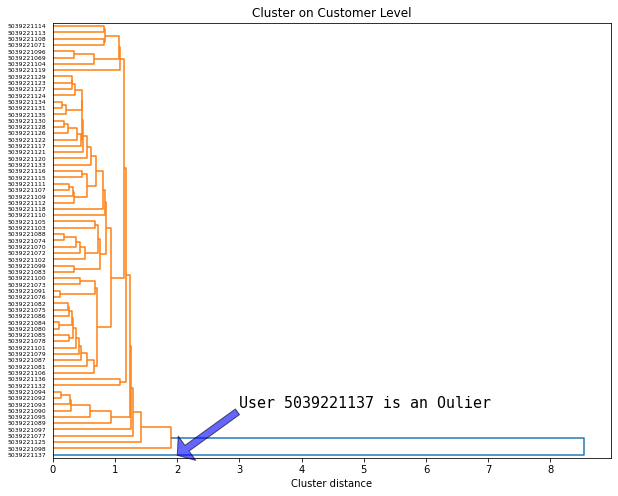

In [53]:
fig = plt.figure(figsize=(10, 8))
plt.title('Cluster on Customer Level')
plt.xlabel('Cluster distance')
dn = dendrogram(linkage(scaled_cluster), orientation='right', labels=list(scaled_cluster.index))

plt.annotate('User 5039221137 is an Oulier', 
             xy=(2, 4),#箭头末端位置
             
             xytext=(3.0, 80),#文本起始位置
             
             #箭头属性设置
            arrowprops=dict(facecolor='b', 
                            shrink=1,#箭头的收缩比
                            alpha=0.6,
                            width=7,#箭身宽
                            headwidth=30,#箭头宽
                            frac=0.5,#身与头比
                           ),
             fontsize=15, color='black',family='monospace'
            )
plt.savefig('clusterfigure.jpg')

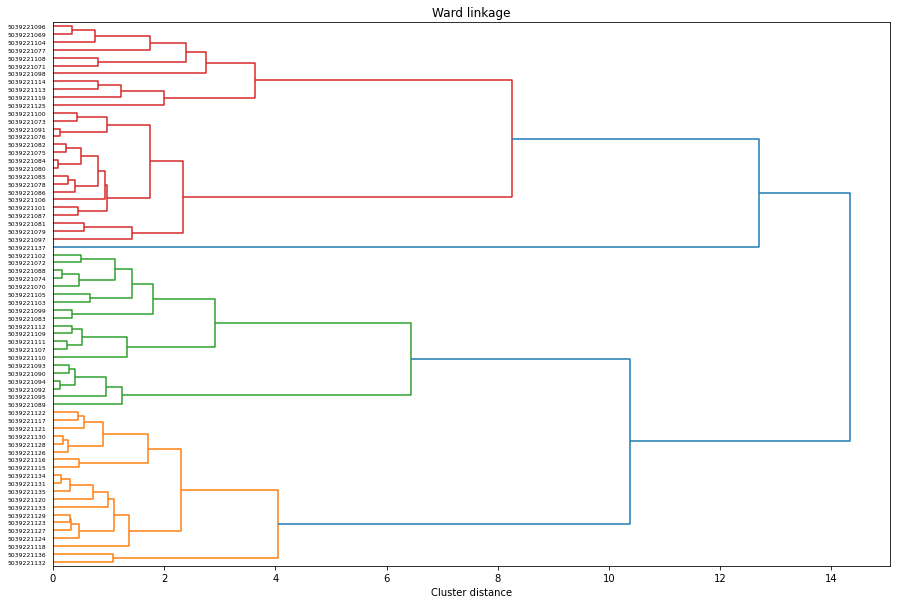

In [54]:
fig = plt.figure(figsize=(15, 10))
plt.title('Ward linkage')
plt.xlabel('Cluster distance')
dn = dendrogram(linkage(scaled_cluster, method='ward'), orientation='right', labels=list(scaled_cluster.index))
plt.show()

In [55]:
data[data['Cust_Num'] == '5039221137']

,Cust_Num,Payment.Method.description,DocumentNo,Doc..Date,Net.due.dt,Amount,Clearing.Date,Clrng.doc.,ZIPCODE,Region,City,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.,log_Amount
21309,5039221137,No Payment Method,91225054438,02-Jul-13,07-Jul-13,1533271.78,2015-08-31,80992154813,AX0034,AA126,AA67,77.0,6.0,5,785,15.242914
21310,5039221137,No Payment Method,91225054439,02-Jul-13,07-Jul-13,2004097.83,2015-08-31,80992154813,AX0034,AA126,AA67,77.0,6.0,5,785,15.510705


In [56]:
data[data['Days.Overdue..Delay.'] >= 1000]

,Cust_Num,Payment.Method.description,DocumentNo,Doc..Date,Net.due.dt,Amount,Clearing.Date,Clrng.doc.,ZIPCODE,Region,City,Age.Of.Customer.Months.,Age.Of.Customer.Year.,Payment.Term,Days.Overdue..Delay.,log_Amount
27129,5039221078,No Payment Method,91225060256,23-11-2011,21-05-2012,3161.89,2015-10-30,80992159026,AX0045,AA126,AA55,155.0,12.0,180,1257,9.058925


In [57]:
customerdata_cluster.loc['5039221078']

Mean_Age_Months      155.000000
Mean_PaymentTerm     141.265306
Mean_OverdueDelay     38.428571
Mean_LogAmount         9.378012
LogFrequency           4.891820
Name: 5039221078, dtype: float64

In [58]:
customerdata_mean.loc['5039221078']

Mean_Amount          10046.301837
Mean_Age_Months        155.000000
Mean_Age_Year           12.000000
Mean_PaymentTerm       141.265306
Mean_OverdueDelay       38.428571
Mean_LogAmount           9.378012
LogFrequency             4.891820
Name: 5039221078, dtype: float64

In [59]:
customerdata_cluster.loc['5039221137']

Mean_Age_Months       77.000000
Mean_PaymentTerm       5.000000
Mean_OverdueDelay    785.000000
Mean_LogAmount        15.376809
LogFrequency           1.693147
Name: 5039221137, dtype: float64

In [60]:
customerdata_count.loc['5039221137']

Payment.Method.description    2
DocumentNo                    2
Doc..Date                     2
Net.due.dt                    2
Amount                        2
Clearing.Date                 2
Clrng.doc.                    2
ZIPCODE                       2
Region                        2
City                          2
Age.Of.Customer.Months.       2
Age.Of.Customer.Year.         2
Payment.Term                  2
Days.Overdue..Delay.          2
Name: 5039221137, dtype: int64

# XGBoost

In [145]:
import xgboost as xgb 
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost.sklearn import XGBClassifier

In [179]:
# import train
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')
train = train.drop(['Unnamed: 0','LogAmount'], axis=1)
test = test.drop(['Unnamed: 0','LogAmount'], axis=1)

train['Cust_Num'] = train['Cust_Num'].astype(str)
test['Cust_Num'] = test['Cust_Num'].astype(str)
train.head() 

outlier = pd.read_csv('Outlier_test.csv')
outlier['City'] = 'Others'
outlier['Amount'] = [1533271.78,2004097.83]
outlier.head() 

,Cust_Num,frequency,mean_delay,mean_amount,Payment.Method.description,Amount,Region,City,Age.Of.Customer.Months.,Payment.Term,Weekday_DocDate,Weekday_NetdueDate,term_grp,due_days_bin,Quarter
0,5039221137,2,785,1768684.805,No Payment Method,1533271.78,AA126,Others,77,5,Tue,Sun,less than one week,More Than 60 Days,3
1,5039221137,2,785,1768684.805,No Payment Method,2004097.83,AA126,Others,77,5,Tue,Sun,less than one week,More Than 60 Days,3


In [181]:
test1 = pd.concat([test, outlier])
test1.index = range(len(test1))
test1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9169 entries, 0 to 9168
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cust_Num                    9169 non-null   object 
 1   mean_delay                  9169 non-null   float64
 2   frequency                   9169 non-null   int64  
 3   mean_amount                 9169 non-null   float64
 4   Payment.Method.description  9169 non-null   object 
 5   Amount                      9169 non-null   float64
 6   Region                      9169 non-null   object 
 7   City                        9169 non-null   object 
 8   Age.Of.Customer.Months.     9169 non-null   int64  
 9   Payment.Term                9169 non-null   int64  
 10  Weekday_DocDate             9169 non-null   object 
 11  Weekday_NetdueDate          9169 non-null   object 
 12  term_grp                    9169 non-null   object 
 13  due_days_bin                9169 

In [182]:
# test mean_delay encoding

cust_Num = list(train['Cust_Num'].unique())
mean_delay_encoding = {}

train_group = train.groupby('Cust_Num').mean()

for i in cust_Num:
    mean_delay_encoding.update({i: train_group.loc[i, 'mean_delay']})

test.mean_delay = 0
for i in cust_Num:
    test.loc[test['Cust_Num']==i, 'mean_delay'] = mean_delay_encoding[i]
 

In [183]:
# test1 mean_delay encoding

cust_Num = list(train['Cust_Num'].unique())
mean_delay_encoding = {}

train_group = train.groupby('Cust_Num').mean()

for i in cust_Num:
    mean_delay_encoding.update({i: train_group.loc[i, 'mean_delay']})

test1.mean_delay = 0
for i in cust_Num:
    test1.loc[test1['Cust_Num']==i, 'mean_delay'] = mean_delay_encoding[i]
 

train['Net.due.dt'] = pd.to_datetime(train['Net.due.dt'])
train['Quarter'] = 0
train.loc[(1<=train['Net.due.dt'].dt.month) & (train['Net.due.dt'].dt.month<=3),'Quarter'] = 1
train.loc[(4<=train['Net.due.dt'].dt.month) & (train['Net.due.dt'].dt.month<=6),'Quarter'] = 2
train.loc[(7<=train['Net.due.dt'].dt.month) & (train['Net.due.dt'].dt.month<=9),'Quarter'] = 3
train.loc[(10<=train['Net.due.dt'].dt.month) & (train['Net.due.dt'].dt.month<=12),'Quarter'] = 4

test['Net.due.dt'] = pd.to_datetime(test['Net.due.dt'])
test['Quarter'] = 0
test.loc[(1<=test['Net.due.dt'].dt.month) & (test['Net.due.dt'].dt.month<=3),'Quarter'] = 1
test.loc[(4<=test['Net.due.dt'].dt.month) & (test['Net.due.dt'].dt.month<=6),'Quarter'] = 2
test.loc[(7<=test['Net.due.dt'].dt.month) & (test['Net.due.dt'].dt.month<=9),'Quarter'] = 3
test.loc[(10<=test['Net.due.dt'].dt.month) & (test['Net.due.dt'].dt.month<=12),'Quarter'] = 4

train = train.drop('Net.due.dt',axis=1)
test = test.drop('Net.due.dt',axis=1)

print(train.shape)
print(test.shape)

train.to_csv('train_clean.csv')
test.to_csv('test_clean.csv') 

due_bin = {
    'Less than 0 days': 0 ,
    '1-30 Days':1,
    '31-60 Days':2,
    'More Than 60 Days':3
}

class_names = list(due_bin.keys())

for (x,y) in due_bin.items():
    x_index = train[train['due_days_bin'] == x].index
    train.loc[x_index, 'due_days_bin_'] = y
    x_index = test[test['due_days_bin'] == x].index
    test.loc[x_index, 'due_days_bin_'] = y
    
test[['due_days_bin_','due_days_bin']].head(11)

In [184]:
due_bin = {
    'Mon': 1 ,
    'Tue':2,
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7
}

    
for (x,y) in due_bin.items():
    x_index = train[train['Weekday_DocDate'] == x].index
    train.loc[x_index, 'Weekday_DocDate'] = y
    x_index = train[train['Weekday_NetdueDate'] == x].index
    train.loc[x_index, 'Weekday_NetdueDate'] = y


for (x,y) in due_bin.items():
    x_index = test[test['Weekday_DocDate'] == x].index
    test.loc[x_index, 'Weekday_DocDate'] = y
    x_index = test[test['Weekday_NetdueDate'] == x].index
    test.loc[x_index, 'Weekday_NetdueDate'] = y
    
train[['Weekday_DocDate','Weekday_NetdueDate']].head(11) 

,Weekday_DocDate,Weekday_NetdueDate
0,5,1
1,1,2
2,3,3
3,4,3
4,5,2
5,4,2
6,5,5
7,3,5
8,7,4
9,7,2


In [185]:
for (x,y) in due_bin.items():
    x_index = test1[test1['Weekday_DocDate'] == x].index
    test1.loc[x_index, 'Weekday_DocDate'] = y
    x_index = test1[test1['Weekday_NetdueDate'] == x].index
    test1.loc[x_index, 'Weekday_NetdueDate'] = y
    
outlier[['Weekday_DocDate','Weekday_NetdueDate']].head(11) 

,Weekday_DocDate,Weekday_NetdueDate
0,Tue,Sun
1,Tue,Sun


In [186]:
#create a mapping from labels to a unique integer and vice versa for labelling and prediction later
labels = train['due_days_bin'].unique()
i = 0
idx2class = {} 
class2idx = {}
for tp in labels:
    idx2class[i] = tp
    class2idx[tp] = i
    i += 1
idx2class

{0: '1-30 Days',
 1: 'Less than 0 days',
 2: 'More Than 60 Days',
 3: '31-60 Days'}

In [187]:
class2idx

{'1-30 Days': 0,
 'Less than 0 days': 1,
 'More Than 60 Days': 2,
 '31-60 Days': 3}

In [188]:
train['label'] = train['due_days_bin'].replace(class2idx)
test['label'] = test['due_days_bin'].replace(class2idx) 
train.head()

,Cust_Num,mean_delay,frequency,mean_amount,Payment.Method.description,Amount,Region,City,Age.Of.Customer.Months.,Payment.Term,Weekday_DocDate,Weekday_NetdueDate,term_grp,due_days_bin,Quarter,label
0,5039221069,20.941176,17,179081.917647,No Payment Method,662711.04,AA126,Others,155.0,94,5,1,less than half year,1-30 Days,3,0
1,5039221069,20.941176,17,179081.917647,No Payment Method,86575.47,AA126,Others,155.0,99,1,2,less than half year,1-30 Days,1,0
2,5039221069,20.941176,17,179081.917647,No Payment Method,23230.19,AA126,Others,155.0,105,3,3,less than half year,1-30 Days,3,0
3,5039221069,20.941176,17,179081.917647,No Payment Method,6134.49,AA126,Others,155.0,97,4,3,less than half year,1-30 Days,3,0
4,5039221069,20.941176,17,179081.917647,No Payment Method,17981.89,AA126,Others,155.0,102,5,2,less than half year,1-30 Days,1,0


In [189]:
test1['label'] = test1['due_days_bin'].replace(class2idx) 
test1.head()

,Cust_Num,mean_delay,frequency,mean_amount,Payment.Method.description,Amount,Region,City,Age.Of.Customer.Months.,Payment.Term,Weekday_DocDate,Weekday_NetdueDate,term_grp,due_days_bin,Quarter,label
0,5039221069,20.941176,20,163350.762500,No Payment Method,24735.85,AA126,Others,155,94,3,6,less than half year,1-30 Days,1,0
1,5039221069,20.941176,20,163350.762500,No Payment Method,74207.55,AA126,Others,155,113,2,3,less than half year,1-30 Days,3,0
2,5039221069,20.941176,20,163350.762500,No Payment Method,123679.25,AA126,Others,155,98,5,5,less than half year,More Than 60 Days,2,2
3,5039221070,-2.678967,341,29209.554692,Direct Debits 1,21.83,Others,Others,155,5,6,4,less than one week,Less than 0 days,2,1
4,5039221070,-2.678967,341,29209.554692,Direct Debits 2,7344.92,Others,Others,155,31,1,4,less than 2 months,1-30 Days,3,0


In [190]:
train['Weekday_DocDate'] = train['Weekday_DocDate'].astype(int)
print(train['Weekday_DocDate'].dtype)
train['Weekday_NetdueDate'] = train['Weekday_NetdueDate'].astype(int)
print(train['Weekday_NetdueDate'].dtype)
test['Weekday_DocDate'] = test['Weekday_DocDate'].astype(int)
print(test['Weekday_DocDate'].dtype)
test['Weekday_NetdueDate'] = test['Weekday_NetdueDate'].astype(int)
print(test['Weekday_NetdueDate'].dtype)

int64
int64
int64
int64


In [191]:
test1['Weekday_DocDate'] = test1['Weekday_DocDate'].astype(int)
print(test1['Weekday_DocDate'].dtype)
test1['Weekday_NetdueDate'] = test1['Weekday_NetdueDate'].astype(int)
print(test1['Weekday_NetdueDate'].dtype)

int64
int64


In [192]:
from sklearn.metrics import accuracy_score, f1_score

X_train = train.drop(['Cust_Num','due_days_bin','label'],axis=1)
y_train = train['label'].values

X_test = test.drop(['Cust_Num','due_days_bin','label'],axis=1)
y_test = test['label'].values

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('---------------------------------')
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape) 

X_train shape: (36672, 13)
y_train shape: (36672,)
---------------------------------
X_test shape: (9167, 13)
y_test shape: (9167,)


In [193]:
X_test1 = test1.drop(['Cust_Num','due_days_bin','label'],axis=1)
y_test1 = test1['label'].values

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('---------------------------------')
print('X_outlier shape:', X_test1.shape)
print('y_outlier shape:', y_test1.shape) 

X_train shape: (36672, 13)
y_train shape: (36672,)
---------------------------------
X_outlier shape: (9169, 13)
y_outlier shape: (9169,)


In [194]:
X_train=pd.get_dummies(X_train, columns=["Payment.Method.description", "Region", "City", "term_grp",'Quarter'], 
                          prefix=["payment_method", "region","city", "term_grp",'Quarter'])

X_test=pd.get_dummies(X_test, columns=["Payment.Method.description", "Region", "City", "term_grp" ,'Quarter'], 
                          prefix=["payment_method", "region","city", "term_grp",'Quarter'])

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('---------------------------------')
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (36672, 35)
y_train shape: (36672,)
---------------------------------
X_test shape: (9167, 35)
y_test shape: (9167,)


In [195]:
X_test1=pd.get_dummies(X_test1, columns=["Payment.Method.description", "Region", "City", "term_grp" ,'Quarter'], 
                          prefix=["payment_method", "region","city", "term_grp",'Quarter'])

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('---------------------------------')
print('X_test1 shape:', X_test1.shape)
print('y_test1 shape:', y_test1.shape)

X_train shape: (36672, 35)
y_train shape: (36672,)
---------------------------------
X_test1 shape: (9169, 35)
y_test1 shape: (9169,)


In [196]:
#store data, all in numpy arrays
training_data = {'X_train':X_train,'Y_train':y_train,
                'X_test': X_test,'Y_test':y_test,
                'X_test1': X_test1, 'Y_test1': y_test1}

In [205]:
def fitXgb(sk_model, training_data=training_data ,epochs=100):
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    test = xgb.DMatrix(training_data['X_test'], label=training_data['Y_test']) 
    test1 = test = xgb.DMatrix(training_data['X_test1'], label=training_data['Y_test1']) 
    params = sk_model.get_xgb_params()
    xgb_model = xgb.train(params, train)
    y_pred, y_test = sk_model.predict(training_data['X_test']), training_data['Y_test']
    y_pred1, y_test1 = sk_model.predict(training_data['X_test1']), training_data['Y_test1']
    print('-- Model Report --')
    print('')
    print('-'*30)
    print('XGBoost Accuracy: '+str(accuracy_score(y_test, y_pred)))
    print('-'*30)
    print('XGBoost Accuracy1: '+str(accuracy_score(y_test1, y_pred1)))
    print('-'*30) 
    kappa = cohen_kappa_score(y_test, y_pred)
    print("Kappa: ", kappa)
    print('-'*30) 
    kappa1 = cohen_kappa_score(y_test1, y_pred1)
    print("Kappa: ", kappa1)
    print('-'*30)
    cm = multilabel_confusion_matrix(y_test, y_pred) 
    print('-'*30)
    cm1 = multilabel_confusion_matrix(y_test1, y_pred1) 
    print(cm)
    print(cm1)
    return y_test1, y_pred1

In [206]:
from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=200,
                    max_depth=10,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)
fitXgb(xgb1, training_data)




Fitting done!
-- Model Report --

------------------------------
XGBoost Accuracy: 0.9329115304898004
------------------------------
XGBoost Accuracy1: 0.9327080379539754
------------------------------
Kappa:  0.8699926656622357
------------------------------
Kappa:  0.8696233370201315
------------------------------
------------------------------
[[[4215  257]
  [ 350 4345]]

 [[4505  354]
  [ 241 4067]]

 [[9134    2]
  [  15   16]]

 [[9032    2]
  [   9  124]]]
[[[4215  259]
  [ 350 4345]]

 [[4507  354]
  [ 241 4067]]

 [[9134    2]
  [  17   16]]

 [[9034    2]
  [   9  124]]]


(array([0, 0, 2, ..., 1, 2, 2]), array([0, 0, 0, ..., 1, 0, 0]))

In [172]:
params ={'learning_rate': 0.1,
          'max_depth': 5,
          'num_boost_round':200,
          'objective': 'multi:softmax',
          'random_state': 27,
          'silent':0,
          'num_class':4
        }

def xgmodel(params):
    classifier = xgb.train(xgb.DMatrix(X_train), xgb.DMatrix(y_train))
    y_pred=model.predict(xgb.DMatrix(X_test))
    
    plot_importance(model)
    plt.show()
     
    table = pd.DataFrame(data=[model.get_fscore()]).T
    table.columns = ['Feature_Importance']  
    print(table.sort_values(by=['Feature_Importance'],ascending=False))
    print('-'*30)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%"
      % (accuracy * 100.0))
    print('-'*30)
    kappa = cohen_kappa_score(y_test, y_pred)
    print("Kappa: ", kappa)
    print('-'*30)
    cm = multilabel_confusion_matrix(y_test, y_pred)
    print(cm)


xgmodel(params) 

ValueError: ('Expecting 2 dimensional numpy.ndarray, got: ', (36672,))

array([[0, 0, 0, ..., 0, 0, 0]])

[21:38:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { num_boost_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




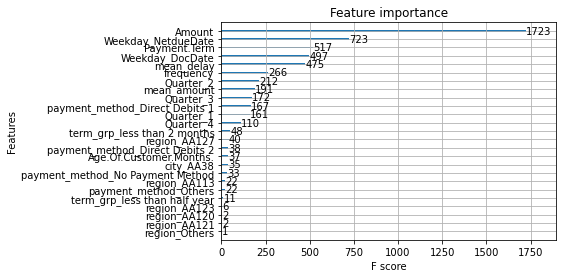

                                  Feature_Importance
Amount                                          1723
Weekday_NetdueDate                               723
Payment.Term                                     517
Weekday_DocDate                                  497
mean_delay                                       475
frequency                                        266
Quarter_2                                        212
mean_amount                                      191
Quarter_3                                        172
payment_method_Direct Debits 1                   167
Quarter_1                                        161
Quarter_4                                        110
term_grp_less than 2 months                       48
region_AA127                                      40
payment_method_Direct Debits 2                    38
Age.Of.Customer.Months.                           37
city_AA38                                         35
payment_method_No Payment Method              

In [372]:
params ={'learning_rate': 0.1,
          'max_depth': 10,
          'num_boost_round':200,
          'objective': 'multi:softmax',
          'random_state': 27,
          'silent':0,
          'num_class':4
        }
xgmodel(params) 

[21:41:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { num_boost_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




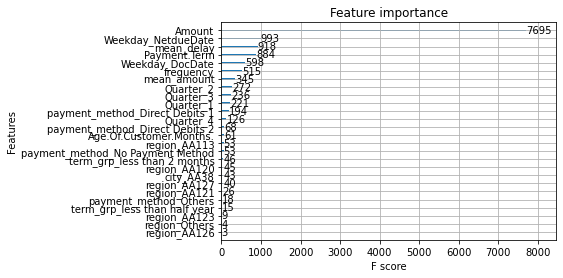

                                  Feature_Importance
Amount                                          7695
Weekday_NetdueDate                               993
mean_delay                                       918
Payment.Term                                     884
Weekday_DocDate                                  598
frequency                                        515
mean_amount                                      345
Quarter_2                                        272
Quarter_3                                        236
Quarter_1                                        221
payment_method_Direct Debits 1                   194
Quarter_4                                        126
payment_method_Direct Debits 2                    68
Age.Of.Customer.Months.                           61
region_AA113                                      53
payment_method_No Payment Method                  53
term_grp_less than 2 months                       46
region_AA120                                  

In [377]:
params ={'learning_rate': 0.05,
          'max_depth': 15,
          'num_boost_round':200,
          'objective': 'multi:softmax',
          'random_state': 27,
          'silent':0,
          'num_class':4
        }
xgmodel(params) 

In [ ]:
plot = sns.barplot(x=features, y=model.feature_importances_)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()